In [124]:
require(repr)
require(copula)
require(scatterplot3d)
options(repr.plot.width=5, repr.plot.height=4)

Loading required package: scatterplot3d


In [80]:
Xtras <- copula:::doExtras()
n <- if(Xtras) 200 else 64

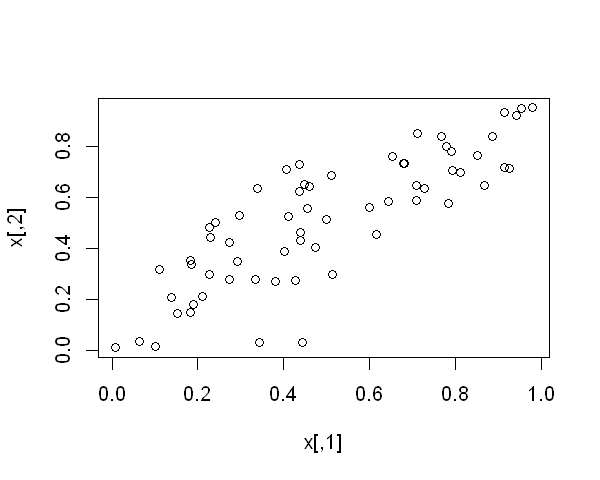

In [81]:
gumbel.cop <- gumbelCopula(3, dim=2)
x <- rCopula(n, gumbel.cop)
plot(x)

In [82]:
gumbel.cop

Gumbel copula, dim. d = 2 
Dimension:  2 
Parameters:
  alpha   = 3

In [83]:
u <- pobs(x)
fit.tau <- fitCopula(gumbelCopula(), u, method='itau')
fit.tau

Call: fitCopula(copula, data = data, method = "itau")
Fit based on "inversion of Kendall's tau" and 64 2-dimensional observations.
Copula: gumbelCopula 
alpha 
2.824 

In [84]:
confint(fit.tau)

,2.5 %,97.5 %
alpha,2.105446,3.541612


In [86]:
confint(fit.tau, level=0.98)

,1 %,99 %
alpha,1.971212,3.675847


In [87]:
summary(fit.tau)

Call: fitCopula(copula, data = data, method = "itau")
Fit based on "inversion of Kendall's tau" and 64 2-dimensional observations.
Gumbel copula, dim. d = 2 
      Estimate Std. Error
alpha    2.824      0.366

In [93]:
coef(fit.tau)

alpha 
2.823529

In [94]:
coef(fit.tau, SE=TRUE)

,Estimate,Std. Error
alpha,2.823529,0.3663756


In [99]:
stopifnot(is.matrix(cm <- coef(fit.tau, SE=TRUE)), cm[,2]>0)

In [105]:
fit.rho <- fitCopula(gumbelCopula(), u, method='irho')
summary(fit.rho)

Call: fitCopula(copula, data = data, method = "irho")
Fit based on "inversion of Spearman's rho" and 64 2-dimensional observations.
Gumbel copula, dim. d = 2 
      Estimate Std. Error
alpha    2.841      0.367

In [104]:
fit.mpl <- fitCopula(gumbelCopula(), u, method='mpl')
summary(fit.mpl)

Call: fitCopula(copula, data = data, method = "mpl")
Fit based on "maximum pseudo-likelihood" and 64 2-dimensional observations.
Gumbel copula, dim. d = 2 
      Estimate Std. Error
alpha    2.784      0.504
The maximized loglikelihood is 39.93 
Optimization converged
Number of loglikelihood evaluations:
function gradient 
       5        5 

In [107]:
fit.ml <- fitCopula(gumbelCopula(), x, method='ml')
summary(fit.ml)

Call: fitCopula(copula, data = data, method = "ml")
Fit based on "maximum likelihood" and 64 2-dimensional observations.
Gumbel copula, dim. d = 2 
      Estimate Std. Error
alpha    3.078      0.322
The maximized loglikelihood is 39.94 
Optimization converged
Number of loglikelihood evaluations:
function gradient 
       6        6 

In [112]:
(ll. <- logLik(fit.ml))

'log Lik.' 39.93612 (df=1)

In [117]:
loglikCopula(coef(fit.ml), u=x, copula=gumbel.cop)

[1] 39.93612

In [125]:
normal.cop <- normalCopula(c(0.6,0.46,0.6), dim=3, dispstr='un')
x <- rCopula(n, normal.cop)

In [137]:
par('pch')

[1] 1

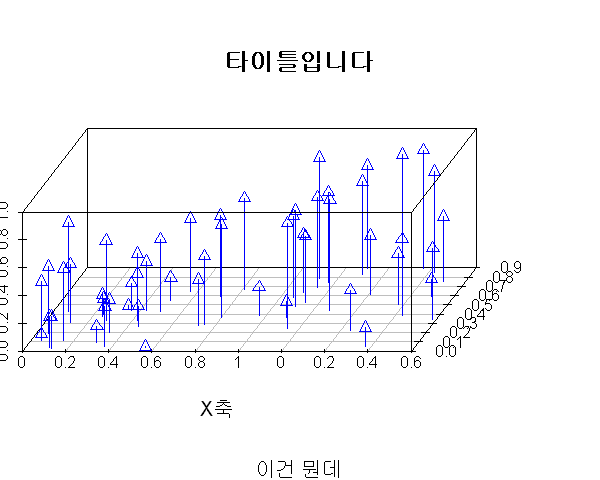

In [301]:
scatterplot3d(x=x[,1], y=x[,2], z=x[,3], color='blue', pch=2,
             main='타이틀입니다', sub='이건 뭔데', xlim=c(0,0.9), ylim=c(0,0.9), zlim=c(0,0.9),
             xlab='X축', ylab='Y축', zlab='높이', scale.y=0.5, angle=60, axis=TRUE, tick.marks=TRUE,
             label.tick.marks=TRUE, x.ticklabs=c(0,0.2,0.4,0.6,0.8,1), y.margin.add=2, grid=TRUE, box=TRUE,
             lab=c(10,10,1), lab.z=6, type='h', mar=c(5,0,5,0), bg='red')